In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Set plot style
sns.set(style="whitegrid")
# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Fill missing values for 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Create a new feature 'CabinAvailable' indicating whether a cabin number is available
data['CabinAvailable'] = data['Cabin'].notna().astype(int)

# Fill missing values for 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to 'Sex'
data['Sex'] = le.fit_transform(data['Sex'])

# Apply label encoding to 'Embarked'
data['Embarked'] = le.fit_transform(data['Embarked'])

# Display the first few rows after cleaning and preprocessing
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinAvailable
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0


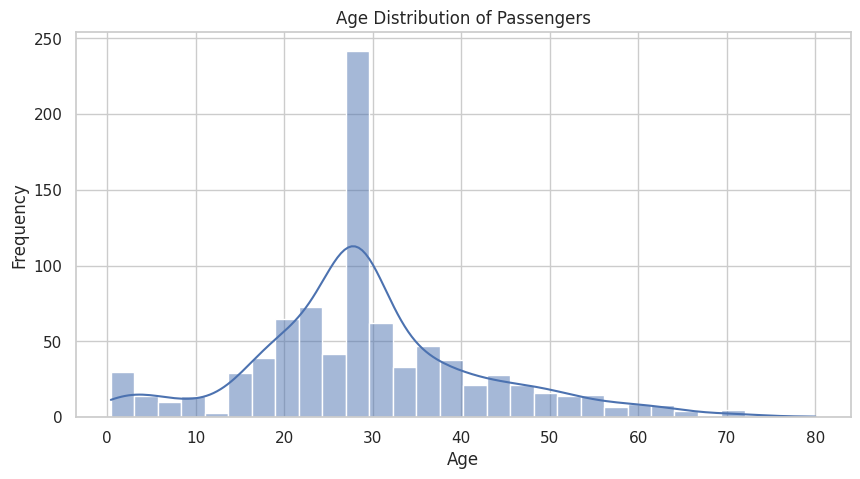

In [5]:
###Univariate Analysis

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


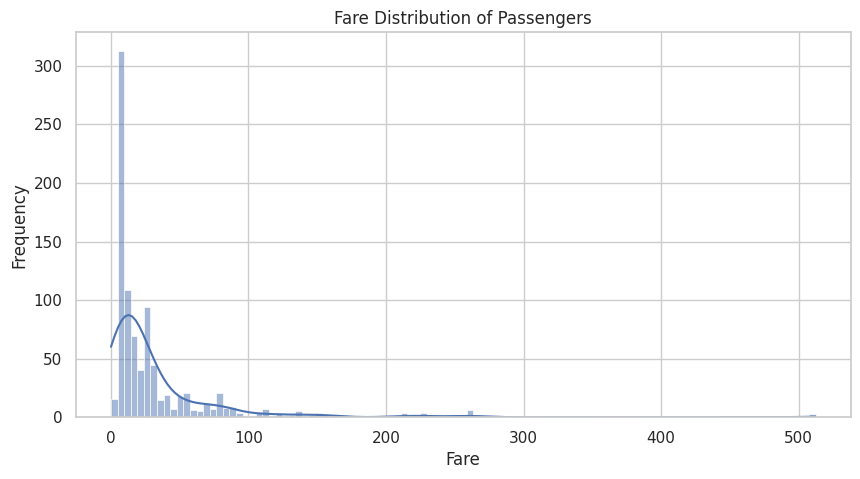

In [6]:
# Distribution of Fare
plt.figure(figsize=(10, 5))
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


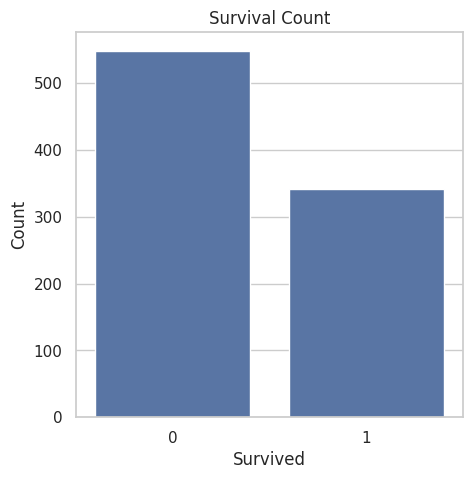

In [7]:
# Survival Rate
plt.figure(figsize=(5, 5))
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


<ipython-input-12-bf1a14e4057a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, ci=None)


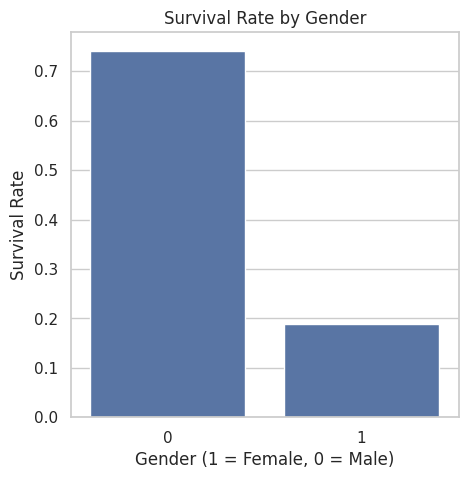

In [12]:
###Bivariate Analysis

# Survival by Gender
plt.figure(figsize=(5, 5))
sns.barplot(x='Sex', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (1 = Female, 0 = Male)')
plt.ylabel('Survival Rate')
plt.show()


<ipython-input-11-ddcaccc4fb0c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, ci=None)


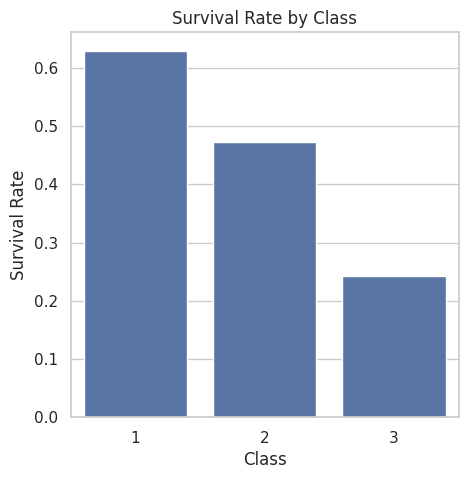

In [11]:
# Survival by Class
plt.figure(figsize=(5, 5))
sns.barplot(x='Pclass', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 35.4% of the points cannot be place

<Figure size 1500x800 with 0 Axes>

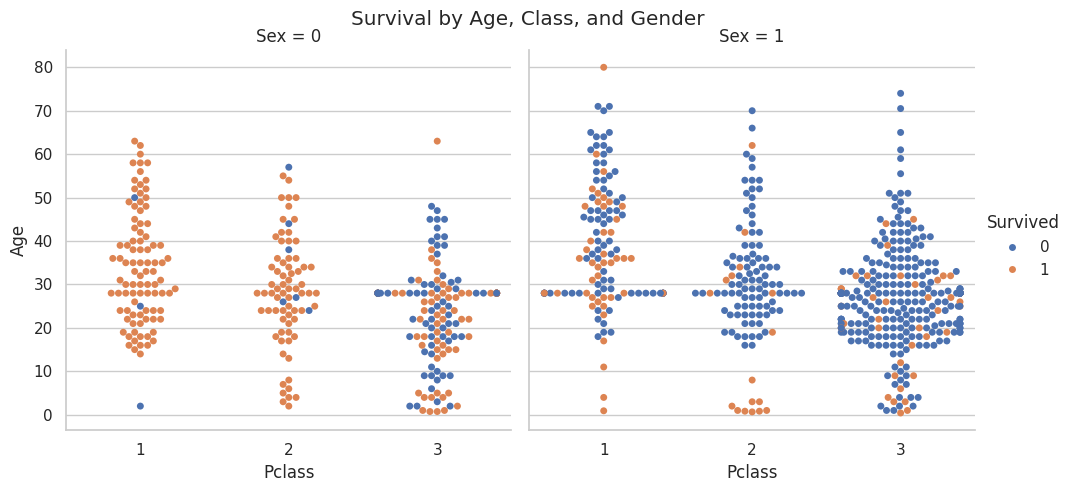

In [17]:
###Multivariate Analysis

# Survival by Age, Class, and Gender
plt.figure(figsize=(15, 8))
sns.catplot(x='Pclass', y='Age', hue='Survived', col='Sex', data=data, kind='swarm', height=5, aspect=1)
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival by Age, Class, and Gender')
plt.show()